<a href="https://colab.research.google.com/github/Sushama8/Projects/blob/main/Cancer_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cancer Detection using CNN**

In [ ]:
!unzip /content/tumor_dataset.zip

unzip:  cannot find or open /content/tumor_dataset.zip, /content/tumor_dataset.zip.zip or /content/tumor_dataset.zip.ZIP.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# New section

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

### Counting number of images
### Notation -> Yes-1 and No-0


In [ ]:
ROOT_DIR = "/content/tumor_dataset/tumour_dataset"
no_of_images = {}

for dir in os.listdir(ROOT_DIR):
  no_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

no_of_images.items()

dict_items([('no', 1500), ('yes', 1500)])

In [ ]:
len(os.listdir("/content/tumor_dataset/tumour_dataset"))

2

spliting data


*   70% for training
*   15% for validation
*   15% for testing






In [ ]:
def folderCreator(path, split):
  if not os.path.exists("./"+path):
    os.mkdir("/"+path)
    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a= os.listdir(os.path.join(ROOT_DIR, dir)) , size = (math.floor(split*no_of_images[dir])-5), replace=False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+path,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"The {path} folder exists")

In [ ]:
folderCreator("train", 0.7)

In [ ]:
folderCreator("val", 0.15)

In [ ]:
folderCreator("test", 0.15)

#Building the prediction model

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import keras

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size= (3,3), activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters=36, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=64, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=128, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation = 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics = ['accuracy'])

# Generating data in compatible format for the model

In [ ]:
def imagePreprocesstrain(path):
  image_data =ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size =32, class_mode='binary')

  return image

In [ ]:
path ="/content/train"
train_data = imagePreprocesstrain(path)

Found 2090 images belonging to 2 classes.


In [ ]:
def imagePreprocesstest(path):
  image_data =ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size =32, class_mode='binary')

  return image

In [ ]:
path ="/content/test"
test_data = imagePreprocesstest(path)

Found 440 images belonging to 2 classes.


In [ ]:
path ="/content/val"
val_data = imagePreprocesstest(path)

Found 440 images belonging to 2 classes.


### Early Stopping and Model Checkpoint

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es= EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=6, verbose=1, mode='auto')

mc= ModelCheckpoint(monitor='val_accuracy', filepath= "./bestmodel.h56", verbose=1, save_best_only=True, mode='auto')

cd=[es, mc]

In [ ]:
hs = model.fit_generator(generator=train_data,
                         steps_per_epoch=8,
                         epochs=30,
                         verbose=1,
                         validation_data=val_data,
                         validation_steps=12,
                         callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6524 - accuracy: 0.6211
Epoch 1: val_accuracy improved from -inf to 0.61719, saving model to ./bestmodel.h56


8/8 [==============================] - 21s 819ms/step - loss: 0.6524 - accuracy: 0.6211 - val_loss: 0.6422 - val_accuracy: 0.6172
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6133 - accuracy: 0.6523
Epoch 2: val_accuracy improved from 0.61719 to 0.71094, saving model to ./bestmodel.h56


8/8 [==============================] - 8s 1s/step - loss: 0.6133 - accuracy: 0.6523 - val_loss: 0.5534 - val_accuracy: 0.7109
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6347 - accuracy: 0.6836
Epoch 3: val_accuracy improved from 0.71094 to 0.71615, saving model to ./bestmodel.h56


8/8 [==============================] - 7s 904ms/step - loss: 0.6347 - accuracy: 0.6836 - val_loss: 0.5603 - val_accuracy: 0.7161
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.5890 - accuracy: 0.7305
Epoch 4: val_accuracy did not improve from 0.71615
8/8 [==============================] - 5s 586ms/step - loss: 0.5890 - accuracy: 0.7305 - val_loss: 0.5635 - val_accuracy: 0.7005
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.5733 - accuracy: 0.7031
Epoch 5: val_accuracy did not improve from 0.71615
8/8 [==============================] - 6s 758ms/step - loss: 0.5733 - accuracy: 0.7031 - val_loss: 0.5731 - val_accuracy: 0.7083
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.5453 - accuracy: 0.6966
Epoch 6: val_accuracy improved from 0.71615 to 0.71875, saving model to ./bestmodel.h56


8/8 [==============================] - 6s 826ms/step - loss: 0.5453 - accuracy: 0.6966 - val_loss: 0.5218 - val_accuracy: 0.7188
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.5340 - accuracy: 0.7422
Epoch 7: val_accuracy improved from 0.71875 to 0.77865, saving model to ./bestmodel.h56


8/8 [==============================] - 8s 997ms/step - loss: 0.5340 - accuracy: 0.7422 - val_loss: 0.4920 - val_accuracy: 0.7786
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.4910 - accuracy: 0.7500
Epoch 8: val_accuracy did not improve from 0.77865
8/8 [==============================] - 6s 776ms/step - loss: 0.4910 - accuracy: 0.7500 - val_loss: 0.5046 - val_accuracy: 0.7708
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.5552 - accuracy: 0.7344
Epoch 9: val_accuracy did not improve from 0.77865
8/8 [==============================] - 6s 724ms/step - loss: 0.5552 - accuracy: 0.7344 - val_loss: 0.5273 - val_accuracy: 0.7396
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.4978 - accuracy: 0.7695
Epoch 10: val_accuracy improved from 0.77865 to 0.79167, saving model to ./bestmodel.h56


8/8 [==============================] - 7s 994ms/step - loss: 0.4978 - accuracy: 0.7695 - val_loss: 0.4754 - val_accuracy: 0.7917
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.4696 - accuracy: 0.8008
Epoch 11: val_accuracy did not improve from 0.79167
8/8 [==============================] - 6s 799ms/step - loss: 0.4696 - accuracy: 0.8008 - val_loss: 0.7198 - val_accuracy: 0.7318
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.5648 - accuracy: 0.7383
Epoch 12: val_accuracy improved from 0.79167 to 0.82812, saving model to ./bestmodel.h56


8/8 [==============================] - 7s 997ms/step - loss: 0.5648 - accuracy: 0.7383 - val_loss: 0.4603 - val_accuracy: 0.8281
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.4529 - accuracy: 0.8125
Epoch 13: val_accuracy did not improve from 0.82812
8/8 [==============================] - 6s 763ms/step - loss: 0.4529 - accuracy: 0.8125 - val_loss: 0.4833 - val_accuracy: 0.7760
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.4997 - accuracy: 0.7812
Epoch 14: val_accuracy did not improve from 0.82812
8/8 [==============================] - 6s 766ms/step - loss: 0.4997 - accuracy: 0.7812 - val_loss: 0.4417 - val_accuracy: 0.8073
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.4558 - accuracy: 0.7773
Epoch 15: val_accuracy did not improve from 0.82812
8/8 [==============================] - 6s 751ms/step - loss: 0.4558 - accuracy: 0.7773 - val_loss: 0.5640 - val_accuracy: 0.7682
Epoch 16/30
8/8 [==============================] 

## Graphical Representation of loss and accuracy

In [ ]:
h =hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

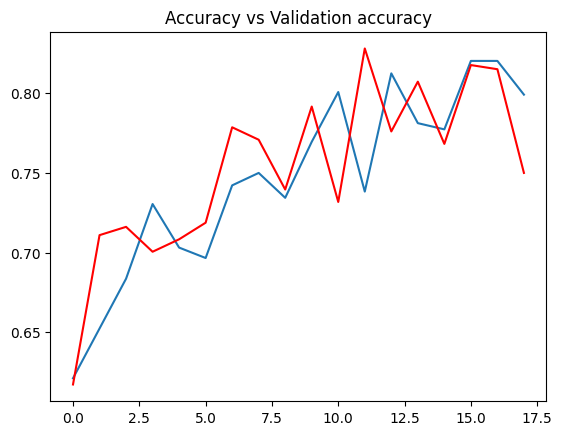

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')

plt.title("Accuracy vs Validation accuracy")
plt.show()

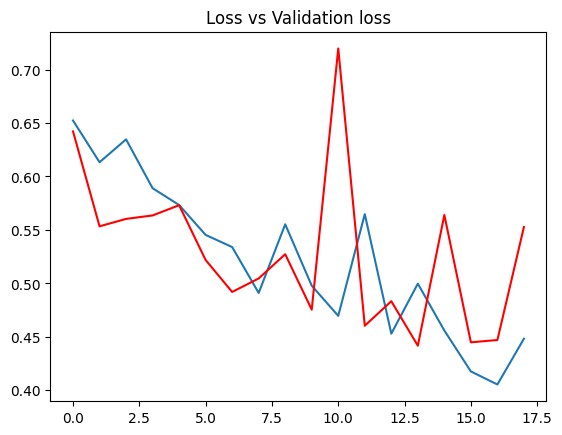

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')

plt.title("Loss vs Validation loss")
plt.show()

## Accuracy

In [ ]:
from keras.models import load_model

model= load_model("/content/bestmodel.h56")

In [ ]:
acc = model.evaluate_generator(test_data)[1]

print(f"The accuracy of our model is {acc*100} %")

The accuracy of our model is 78.86363863945007 %


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}

In [ ]:
path = "/content/tumor_dataset/tumour_dataset/no/no140.jpg"

img = load_img(path, target_size = (224,224))
input_array = img_to_array(img)/255
#input_array.shape
input_array = np.expand_dims(input_array, axis=0)

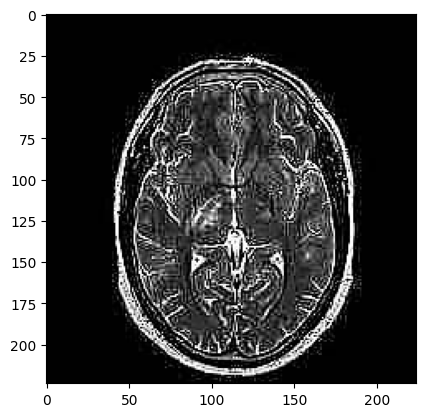

1/1 [==============================] - 1s 667ms/step
The given MRI is NOT having Tumor


In [ ]:
plt.imshow(img)
plt.show()

#prediction = model.predict_classes(input_array)[0][0]
predict_x=model.predict(input_array)
classes_x=np.argmax(predict_x,axis=1)

if classes_x == 0:
  print("The given MRI is NOT having Tumor")
else:
  print("The given MRI is having Tumor")

In [ ]:
path = "/content/tumor_dataset/tumour_dataset/yes/y1178.jpg"

img = load_img(path, target_size = (224,224))
input_array = img_to_array(img)/255
#input_array.shape
input_array = np.expand_dims(input_array, axis=0)

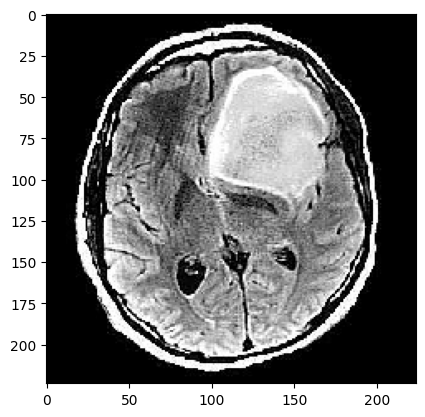

1/1 [==============================] - 0s 86ms/step
The given MRI is having Tumor


In [ ]:
plt.imshow(img)
plt.show()

#prediction = model.predict_classes(input_array)[0][0]
predict_x=model.predict(input_array)
classes_x=np.argmax(predict_x,axis=1)

if classes_x == 1:
  print("The given MRI is NOT having Tumor")
else:
  print("The given MRI is having Tumor")